# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: 

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [87]:
# TODO: Import dataset and inspect the first five columns

path = 'seeds_dataset.txt'
df = pd.read_csv(path, sep='\s+', header=None)
print(df.head())

       0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1


Next, you will need to separate the data into your feature matrix and target vector.

In [88]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y

X = df.drop(columns=[7])
y = df[7]

print("X shape :", X.shape)
print("y shape :", y.shape)

X shape : (210, 7)
y shape : (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*
I used standardScaler because PCA is extremely sensitive and StandardScaler transforms so that each feature has a mean of 0 and std dec of 1.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [126]:
# TODO: Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
# TODO: Print the shape of the training feature matrix and target vector
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (168, 7)
y_train shape: (168,)
X_test shape: (42, 7)
y_test shape: (42,)


Now that we have our training data, we can implement our selected scaler.

In [128]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [129]:

# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)


### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)


In [131]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("CV Score:", grid_search.best_score_)

y_pred = grid_search.predict(X_test_scaled)

test_score = accuracy_score(y_test, y_pred)
print("Test Score:", test_score)

Best Parameters: {'C': 10.0, 'fit_intercept': True}
CV Score: 0.9468805704099822
Test Score: 0.9523809523809523


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [132]:
# TODO: Predict y labels using best estimator
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test_scaled)

In [137]:
# TODO: Reduce dimensions of test data for plotting

pca = PCA(n_components=2) 
X_test_pca = pca.fit_transform(X_test_scaled)

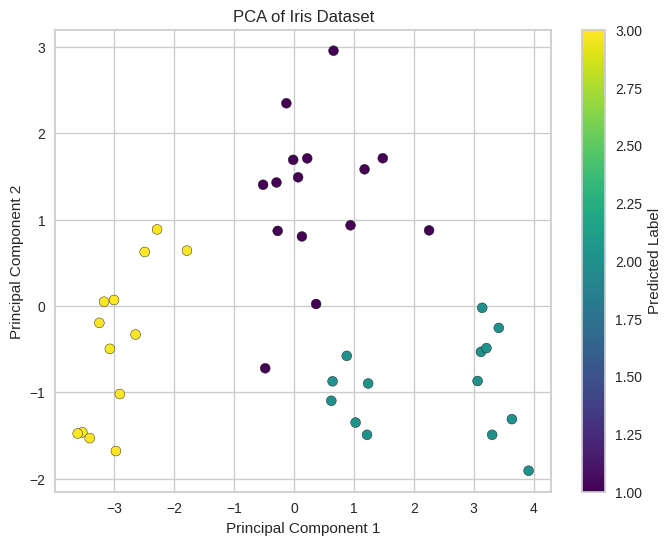

In [138]:
# TODO: Plot test points colored by predicted label

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Predicted Label')
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1. The model worked well. I got a test acuracy of 0.95. Both the test and training scores were high and close together indicating that the model has low bias and variance.
1. PCA worked well and the labels are grouped together well. We can assume the dataset is has linear decision boundaries since it worked well with Logistic Regression.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I refered to the notebooks in the class examples.
2. I completed the steps in order.
3. I did not use chatGpt for this question.
4. I didn't have any challenges with this problem. I followed the example in the lab and class examples for this question. 

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [139]:
# TODO: Scale feature matrix
X.columns = X.columns.astype(str)
X_scaled = scaler.fit_transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

/home/musabedin/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/musabedin/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/musabedin/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/musabedin/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412:

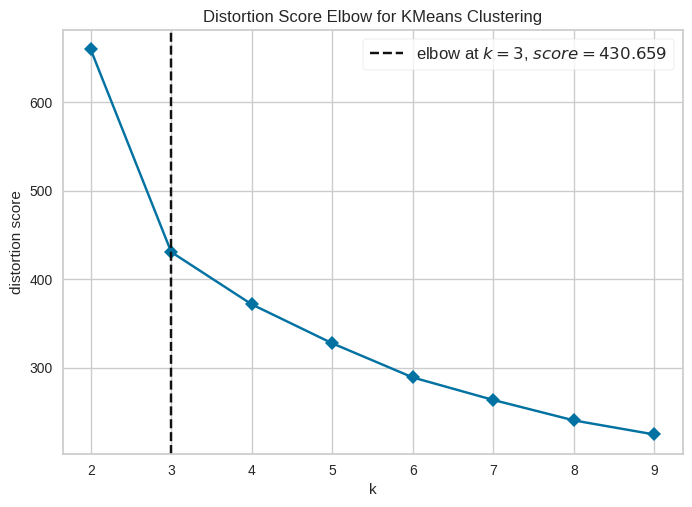

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 timings=False)

In [140]:
# TODO: Use the elbow method to determine the optimal number of clusters

from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state=0), X_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [141]:
# TODO: Implement K-means with the number of clusters determined in the previous step
 
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

/home/musabedin/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [143]:
# TODO: Calculate the three different validation metrics

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette = silhouette_score(X_scaled, y_kmeans)
calinski = calinski_harabasz_score(X_scaled, y_kmeans)
davies = davies_bouldin_score(X_scaled, y_kmeans)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski)
print("Davies-Bouldin Score:", davies)

Silhouette Score: 0.40072705527512986
Calinski-Harabasz Score: 249.7841749161647
Davies-Bouldin Score: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

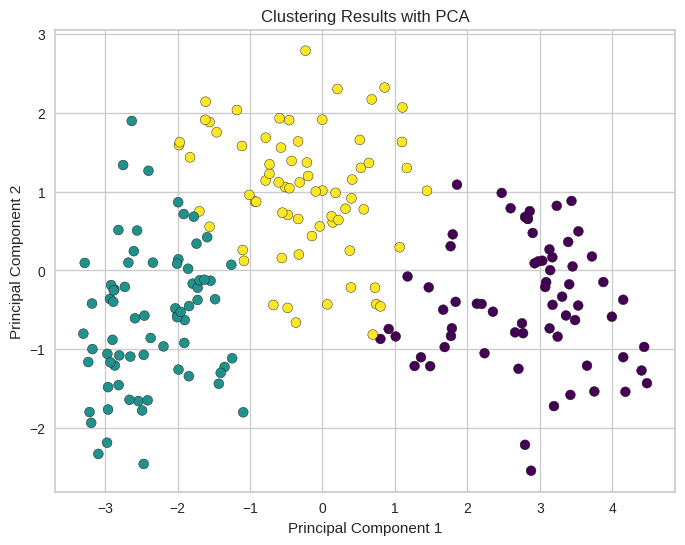

In [144]:
# TODO: Plot clustering results

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.title("Clustering Results with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [146]:
# TODO: Find the number of principal components using explained variance ratio

pca = PCA().fit(X_scaled)
explained_variance = pca.explained_variance_ratio_.cumsum()

n_components = len(explained_variance[explained_variance <= 0.95])
print("Principal Components:", n_components)


Principal Components: 2


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [148]:
# TODO: Use PCA to transform the data
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

In [149]:
# TODO: Implement K-means with the transformed data
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans_pca = kmeans.fit_predict(X_pca)

/home/musabedin/anaconda3/envs/ensf-ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [150]:
# TODO: Calculate the three different validation metrics
silhouette_pca = silhouette_score(X_pca, y_kmeans_pca)
calinski_pca = calinski_harabasz_score(X_pca, y_kmeans_pca)
davies_pca = davies_bouldin_score(X_pca, y_kmeans_pca)

print("Silhouette Score (PCA):", silhouette_pca)
print("Calinski-Harabasz Score (PCA):", calinski_pca)
print("Davies-Bouldin Score (PCA):", davies_pca)

Silhouette Score (PCA): 0.4934304869603191
Calinski-Harabasz Score (PCA): 397.30107838636786
Davies-Bouldin Score (PCA): 0.7066734757979803


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [151]:
# TODO: Display results

results = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'X_scaled': [silhouette, calinski, davies],
    'X_pca': [silhouette_pca, calinski_pca, davies_pca]
})

print(results)

                    Metric    X_scaled       X_pca
0         Silhouette Score    0.400727    0.493430
1  Calinski-Harabasz Score  249.784175  397.301078
2     Davies-Bouldin Score    0.927871    0.706673


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

1. The original dataset had 3 classes. From the distortion metric, we find that 3 is the optimal number of clusters.
1. Yes, the plots have a similar PCA plot. 
1. I used two components. It improved for the silhouette-harabasz score and Calinkski score but decreased for the Davis-Bouldin score. Yes, using PCA improved my results. Normally, reducing number of features will increase clustering accuracy.




### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. I referred to the lab notebooks and the class examples
2. I completed the steps in order
3. I did not use Chatgpt for this.
4. I originally was using the training data on part 2 and had 4 as the optimal number of clusters but I realized it stated to use the original feature matrix. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

Clustering is a very interesting machine learning technique and because the vast majority of data is not labelled, its applicability seem to be much higher for all sorts of machine learning problems. 